# Volatility Methods


In [1]:
import yfinance as yf
from volatility import pricesToReturns
tickers = "SPY AAPL TSLA AD.AS AF.PA NCLH MSFT ^AEX"
# tickers = "SPY AAPL GOOGL TBI JNJ CVS"
# tickers = "SPY CVS TBI"
tickers = 'SPY ^AEX TSLA'
df = yf.download(tickers, start="2010-01-01", end="2021-12-30")
pricesDF = df['Adj Close']
pricesDF = pricesDF[pricesDF.isnull().sum(1).eq(0)]
returnsDF = pricesToReturns(pricesDF)
returnsDF = returnsDF[returnsDF.isnull().sum(1).eq(0)]
returnsDF.head(2)

[*********************100%***********************]  3 of 3 completed


,SPY,TSLA,^AEX
Date,,,
2010-06-30,-0.009500,-0.002512,-0.006959
2010-07-01,-0.004457,-0.078472,-0.028219


In [2]:
from volatility import MA

windowSize = 10
ticker = 'SPY'
returnMethod = 'relative'
prices = pricesDF[ticker]
returns = pricesToReturns(prices, returnMethod)
model = MA(windowSize)
vol = model.predict(returns)
likelihood = model.getLikelihood(returns, indices=returns.index[-200:])
print(f'likelihood : {likelihood}')

# vol.plot();

likelihood : 3.4829315765206132


3.816978584117769

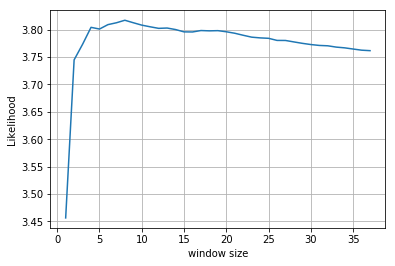

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from volatility import MA

minWindowSize = 2
maxWindowSize = 40
windowSize = pd.DataFrame(np.linspace(minWindowSize,maxWindowSize, maxWindowSize-minWindowSize), columns=['WindowSize']).astype(int)
likelihoods = windowSize.apply(lambda x: MA(x['WindowSize']).getLikelihood(returns, indices=returns.index[-2000:]), axis=1)
likelihoods.plot()
plt.xlabel('window size')
plt.ylabel('Likelihood')
# plt.ylim(top=-1)
plt.grid()
max(likelihoods)

3.8222011322633196

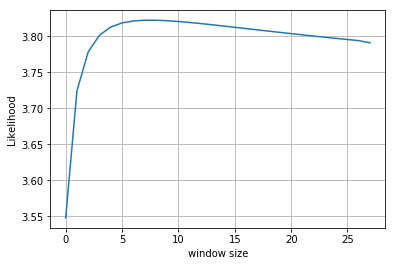

In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from volatility import EMA

minWindowSize = 2
maxWindowSize = 30
windowSize = pd.DataFrame(np.linspace(minWindowSize,maxWindowSize, maxWindowSize-minWindowSize), columns=['WindowSize']).astype(int)
likelihoods = windowSize.apply(lambda x: EMA(x['WindowSize']).getLikelihood(returns, indices=returns.index[-2000:]), axis=1)
likelihoods.plot()
plt.xlabel('window size')
plt.ylabel('Likelihood')
# plt.ylim(top=-1);
plt.grid()
max(likelihoods)



In [303]:
def getPosition(targetAnnualVol, targetExposure, ticker, tradingDays=255, windowSize=5):
    targetDailyVol = targetAnnualVol / (tradingDays ** 0.5)
    symbol = yf.Ticker(ticker)
    pricesDF = symbol.history(period='1y')['Close']
    returnsDF = pricesDF.pct_change()
    volDF = returnsDF.pow(2).rolling(window=windowSize).mean()**0.5
    currentVol = volDF[-1]
    print(currentVol, targetDailyVol)
    targetPositionSize = min(targetExposure, targetExposure*targetDailyVol/currentVol)

    return targetPositionSize


targetAnnualVol = 0.1
targetExposure = 100
ticker = 'TSLA'
getPosition(targetAnnualVol, targetExposure, ticker)


0.04558316984087124 0.006262242910851495


13.738059315999083

In [279]:
import yfinance as yf

tickers = "SPY AAPL TSLA AD.AS AF.PA NCLH MSFT ^AEX"
# tickers = "SPY AAPL GOOGL TBI JNJ CVS"
# tickers = "SPY CVS TBI"
tickers = 'SPY ^AEX TSLA'
tickers = 'SPY'
df = yf.download(tickers, start="2010-01-01", end="2021-12-30")
pricesDF = df['Adj Close']

[*********************100%***********************]  1 of 1 completed


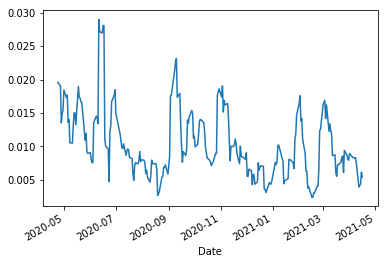

In [289]:
windowSize = 5
symbol = yf.Ticker(ticker)
pricesDF = symbol.history(period='1y')['Close']
returnsDF = pricesDF.pct_change()
volDF = returnsDF.pow(2).rolling(window=windowSize).mean()**0.5
volDF.plot();